### Results for product forecasting

In [1]:
import pandas as pd
from algorithm import Algorithm
import matplotlib.pyplot as plt

#### User Inputs

In [2]:
forecasted_info = pd.read_csv("ForecastedInformation.csv")
forecasted_info["Price"] = forecasted_info["Price"].map(lambda x: float(x[1:]))
# Policy optimization period period- how far in advance we want to forecast the skus
policy_optimization_period = 5
# Weights for missed sales, inventory space, and reorder cost
missed_sales_importance = 1
inventory_space_importance = 1
reorder_cost_importance = 1
# User will input this- it's equivalent to giving a time budget for the algorithm
n_generations = 10000

In [3]:
algo_runner = Algorithm(forecasted_info, policy_optimization_period)

/Users/elizaknapp/Desktop/Harvard/am_207/am207/algorithm.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.prices = prices.ravel()


In [4]:
best_parameters, score, scores = algo_runner.run_algorithm(n_generations, missed_sales_importance, inventory_space_importance, reorder_cost_importance)

[I 2024-12-01 21:54:09,247] A new study created in memory with name: no-name-9fb2d588-229e-465a-8ef6-439748505072
[I 2024-12-01 21:54:09,961] Trial 0 finished with value: 7400865.236280544 and parameters: {'population_size': 36, 'mutation_factor': 0.12784569260615267, 'p_crossover': 0.6192484643460953}. Best is trial 0 with value: 7400865.236280544.
[I 2024-12-01 21:54:10,158] Trial 1 finished with value: 16355112.999182314 and parameters: {'population_size': 10, 'mutation_factor': 1.0935053212737282, 'p_crossover': 0.8306465990887295}. Best is trial 0 with value: 7400865.236280544.
[I 2024-12-01 21:54:10,946] Trial 2 finished with value: 17190122.73529631 and parameters: {'population_size': 33, 'mutation_factor': 1.4711530546838607, 'p_crossover': 0.12149203968095322}. Best is trial 0 with value: 7400865.236280544.
[I 2024-12-01 21:54:11,336] Trial 3 finished with value: 16468724.880242297 and parameters: {'population_size': 17, 'mutation_factor': 1.3920332271761753, 'p_crossover': 0.

/var/folders/hh/rn_fsj015zz6cmlmssx4w0y00000gn/T/ipykernel_76470/3539381131.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


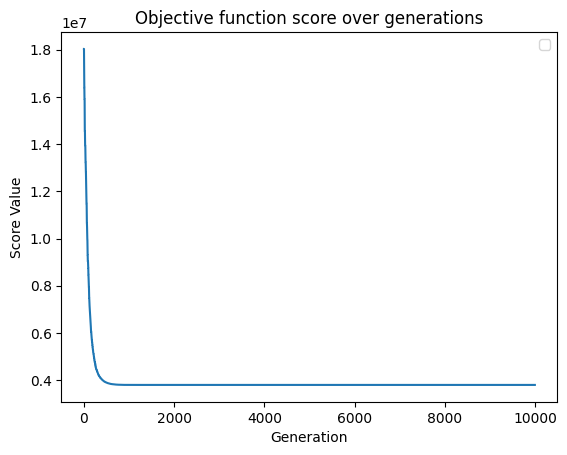

In [6]:
# Plot the scores over time
plt.plot(scores)
plt.title('Objective function score over generations')
plt.xlabel('Generation')
plt.ylabel('Score Value')
plt.legend()
plt.show()

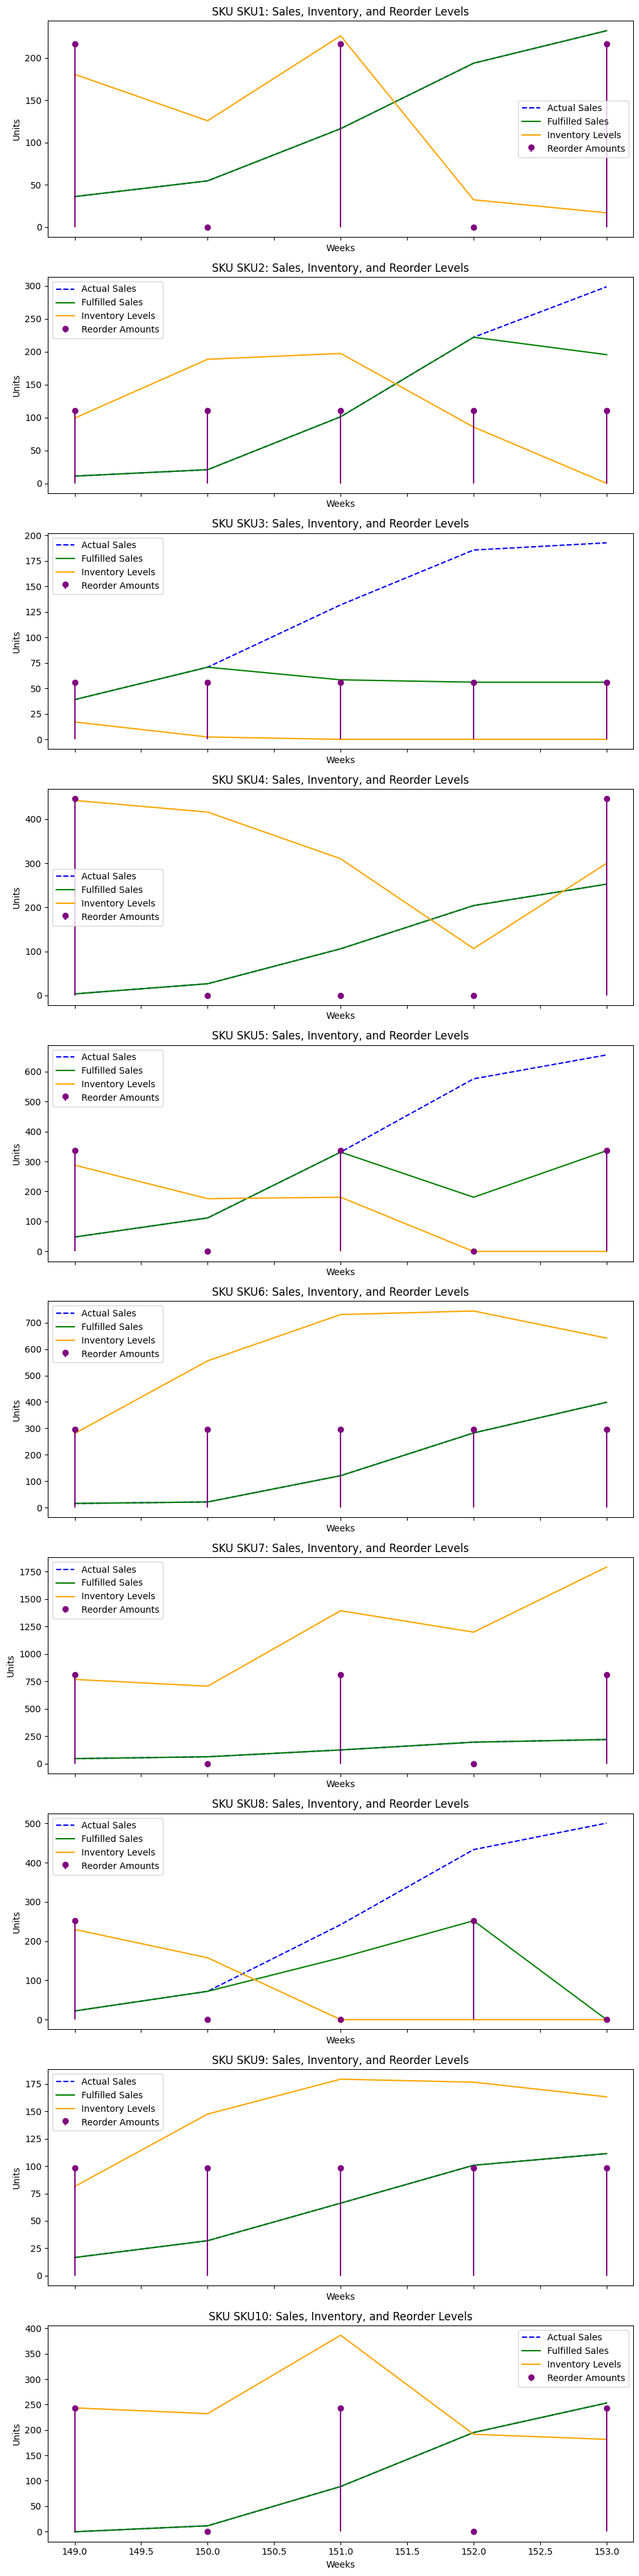

In [14]:
showing_skus = 10
algo_runner.graph_output(best_parameters, showing_skus)

### Results for sanity checks

### No demand sanity check

In [2]:
# Policy optimization period period- how far in advance we want to forecast the skus
policy_optimization_period = 5
# Weights for missed sales, inventory space, and reorder cost
missed_sales_importance = 1
inventory_space_importance = 1
reorder_cost_importance = 1
# User will input this- it's equivalent to giving a time budget for the algorithm
n_generations = 10000

In [7]:
# In the example dataframe, there are 5 weeks and 3 SKUs with arbitrary prices and 0 quantity sold.
p1 = []
p2 = []
p3 = []
p4 = []
for week in range(policy_optimization_period):
  for sku in range(2):
    p1.append(sku)
    p2.append(1.0)
    p3.append(week)
    p4.append(0)

no_demand = {
  "Pcode": p1,
  "Price": p2,
  "Week": p3, 
  "Quantity Sold": p4
}
no_demand_df = pd.DataFrame(no_demand)

In [8]:
no_demand_df

,Pcode,Price,Week,Quantity Sold
0,0,1.0,0,0
1,1,1.0,0,0
2,0,1.0,1,0
3,1,1.0,1,0
4,0,1.0,2,0
5,1,1.0,2,0
6,0,1.0,3,0
7,1,1.0,3,0
8,0,1.0,4,0
9,1,1.0,4,0


In [9]:
algo_runner = Algorithm(no_demand_df, policy_optimization_period)

/Users/elizaknapp/Desktop/Harvard/am_207/am207/algorithm.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.prices = prices.ravel()


In [10]:
best_parameters, score, scores = algo_runner.run_algorithm(n_generations, missed_sales_importance, inventory_space_importance, reorder_cost_importance)

[I 2024-12-01 21:20:45,357] A new study created in memory with name: no-name-6ef932f3-ac36-4660-b335-b31a046c520d
[I 2024-12-01 21:20:45,566] Trial 0 finished with value: 0.0 and parameters: {'population_size': 45, 'mutation_factor': 1.246644189874434, 'p_crossover': 0.15545180105533865}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:20:45,722] Trial 1 finished with value: 0.0 and parameters: {'population_size': 26, 'mutation_factor': 0.8316122888486267, 'p_crossover': 0.19117898418318663}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:20:45,916] Trial 2 finished with value: 0.0 and parameters: {'population_size': 45, 'mutation_factor': 1.4882474773034444, 'p_crossover': 0.8577385280291651}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:20:45,980] Trial 3 finished with value: 0.0 and parameters: {'population_size': 14, 'mutation_factor': 0.8807577946844248, 'p_crossover': 0.18904351079555612}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:20:46,142] Trial 4 finished wit

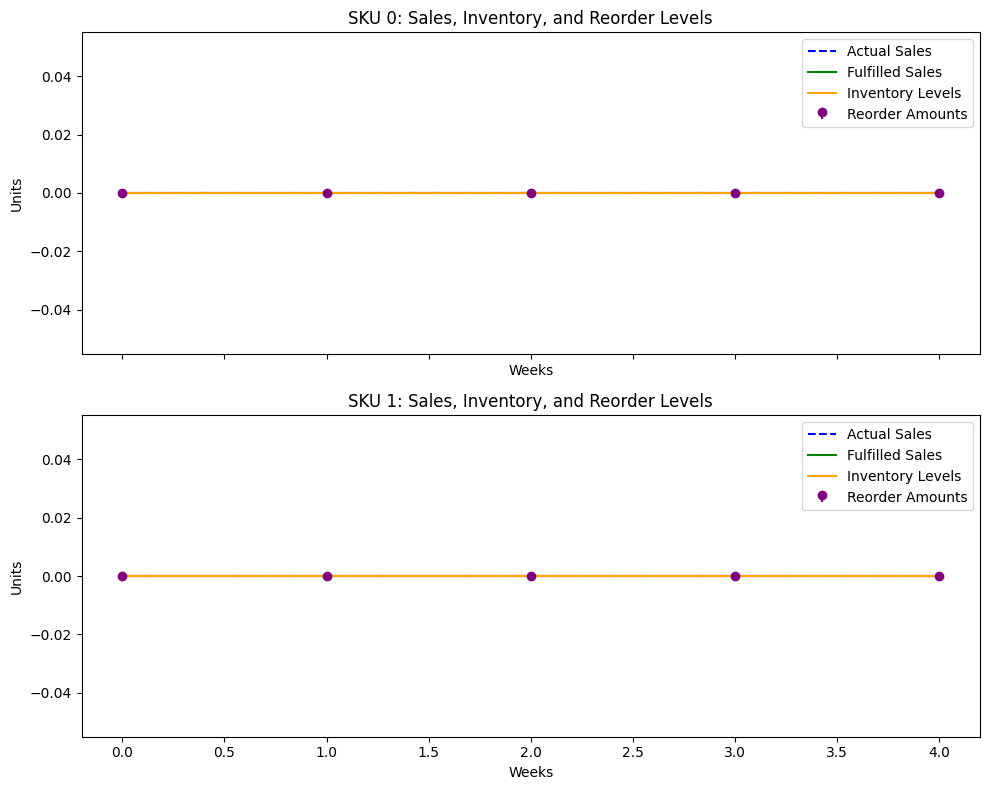

In [11]:
algo_runner.graph_output(best_parameters, showing_skus=2)

### Constant Demand, No Reorder or Inventory Penalty

In [19]:
# Policy optimization period period- how far in advance we want to forecast the skus
policy_optimization_period = 5
# Weights for missed sales, inventory space, and reorder cost
missed_sales_importance = 1
inventory_space_importance = 0
reorder_cost_importance = 0
# User will input this- it's equivalent to giving a time budget for the algorithm
n_generations = 10000

In [20]:
# In the example dataframe, there are 5 weeks and 3 SKUs with arbitrary prices and 0 quantity sold.
p1 = []
p2 = []
p3 = []
p4 = []
for week in range(policy_optimization_period):
  for sku in range(2):
    p1.append(sku)
    p2.append(2)
    p3.append(week)
    p4.append(20)

no_demand = {
  "Pcode": p1,
  "Price": p2,
  "Week": p3, 
  "Quantity Sold": p4
}
df = pd.DataFrame(no_demand)

In [21]:
algo_runner = Algorithm(df, policy_optimization_period)
best_parameters, score, scores = algo_runner.run_algorithm(n_generations, missed_sales_importance, inventory_space_importance, reorder_cost_importance)

[I 2024-12-01 21:26:31,569] A new study created in memory with name: no-name-f6355a37-81e5-442a-a4be-4773c238015c
[I 2024-12-01 21:26:31,638] Trial 0 finished with value: 0.0 and parameters: {'population_size': 10, 'mutation_factor': 1.3847709301469555, 'p_crossover': 0.2292106811294711}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:26:31,795] Trial 1 finished with value: 0.0 and parameters: {'population_size': 36, 'mutation_factor': 1.5145692945406495, 'p_crossover': 0.27703862775829297}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:26:31,866] Trial 2 finished with value: 0.0 and parameters: {'population_size': 15, 'mutation_factor': 1.3756939782852748, 'p_crossover': 0.6179046567225679}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:26:32,055] Trial 3 finished with value: 0.0 and parameters: {'population_size': 44, 'mutation_factor': 1.92118138454088, 'p_crossover': 0.4099669428678113}. Best is trial 0 with value: 0.0.
[I 2024-12-01 21:26:32,253] Trial 4 finished with v

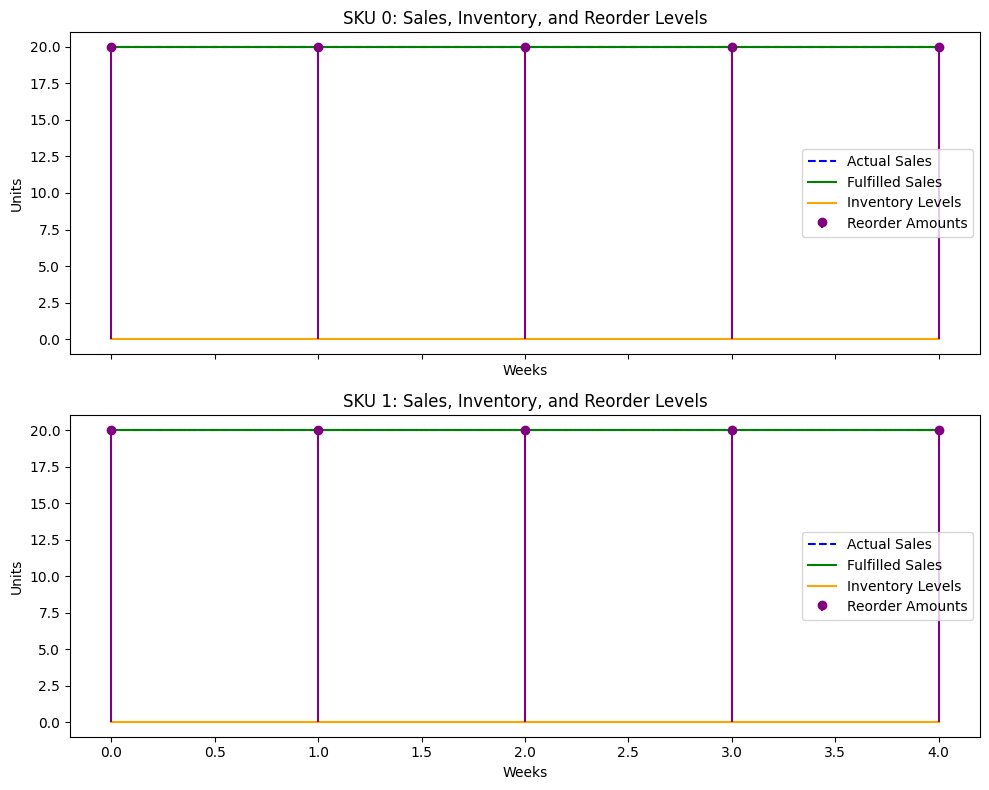

In [22]:
algo_runner.graph_output(best_parameters, showing_skus=2)

### Results for having missed sales vs not having missed sales

In [ ]:
forecasted_info = pd.read_csv("ForecastedInformation.csv")
forecasted_info["Price"] = forecasted_info["Price"].map(lambda x: float(x[1:]))
# Policy optimization period period- how far in advance we want to forecast the skus
policy_optimization_period = 5
# User will input this- it's equivalent to giving a time budget for the algorithm
n_generations = 10000

/Users/elizaknapp/Desktop/Harvard/am_207/am207/algorithm.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.prices = prices.ravel()
[I 2024-12-01 22:25:12,979] A new study created in memory with name: no-name-d678d040-0864-4f31-9e26-551accefe869
[I 2024-12-01 22:25:13,523] Trial 0 finished with value: 15228673.943244413 and parameters: {'population_size': 24, 'mutation_factor': 1.1056419685840302, 'p_crossover': 0.1740302690413108}. Best is trial 0 with value: 15228673.943244413.
[I 2024-12-01 22:25:14,467] Trial 1 finished with value: 15126640.456303556 and parameters: {'population_size': 41, 'mutation_factor': 1.4464984985067006, 'p_crossover': 0.8038293861821728}. Best is trial 1 with value: 15126640.456303556.
[I 2024-12-01 22:25:15,180] Trial 2 finished with value: 6025634.352085041 and parameters: {'population_size': 36, 'mutation_factor': 0.275437246529

[1, 0, 0]


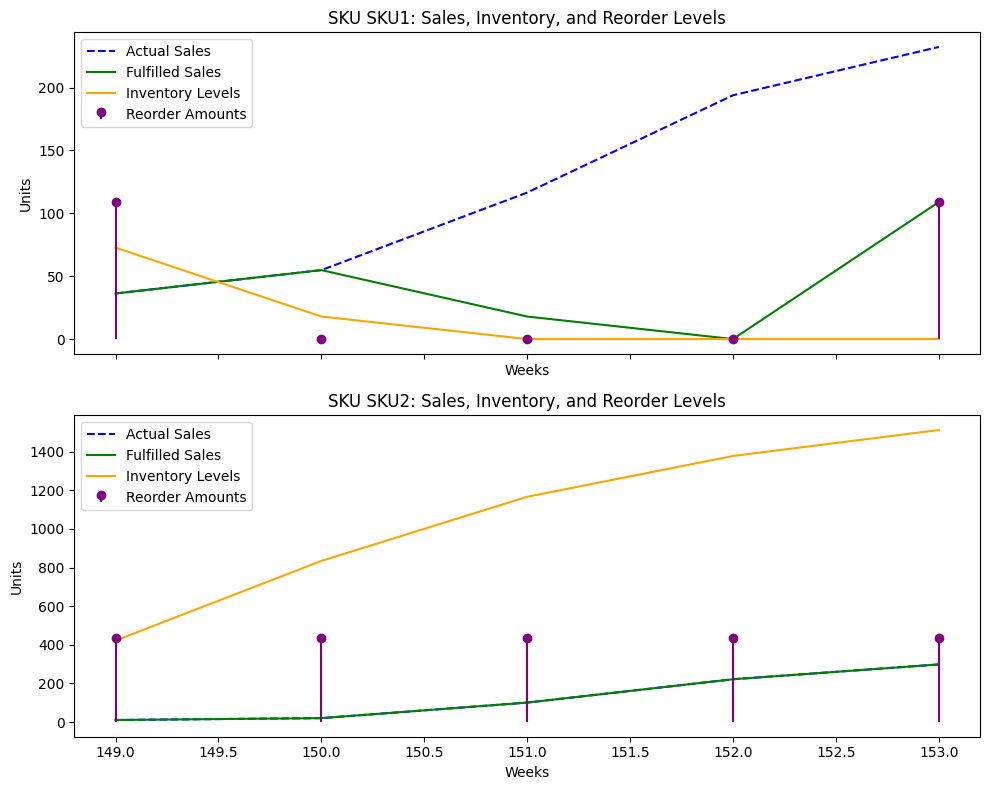

/Users/elizaknapp/Desktop/Harvard/am_207/am207/algorithm.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.prices = prices.ravel()
[I 2024-12-01 22:27:39,693] A new study created in memory with name: no-name-b1a0793b-2319-4322-8075-97a70ef4d7be
[I 2024-12-01 22:27:40,352] Trial 0 finished with value: 68368.82342930505 and parameters: {'population_size': 31, 'mutation_factor': 1.7457692584885618, 'p_crossover': 0.28697550401347754}. Best is trial 0 with value: 68368.82342930505.
[I 2024-12-01 22:27:40,705] Trial 1 finished with value: 335196.23725267936 and parameters: {'population_size': 15, 'mutation_factor': 0.31451571229431113, 'p_crossover': 0.35084941361602856}. Best is trial 0 with value: 68368.82342930505.
[I 2024-12-01 22:27:41,520] Trial 2 finished with value: 54677.35417178381 and parameters: {'population_size': 40, 'mutation_factor': 1.203492727433

[0, 1, 0]


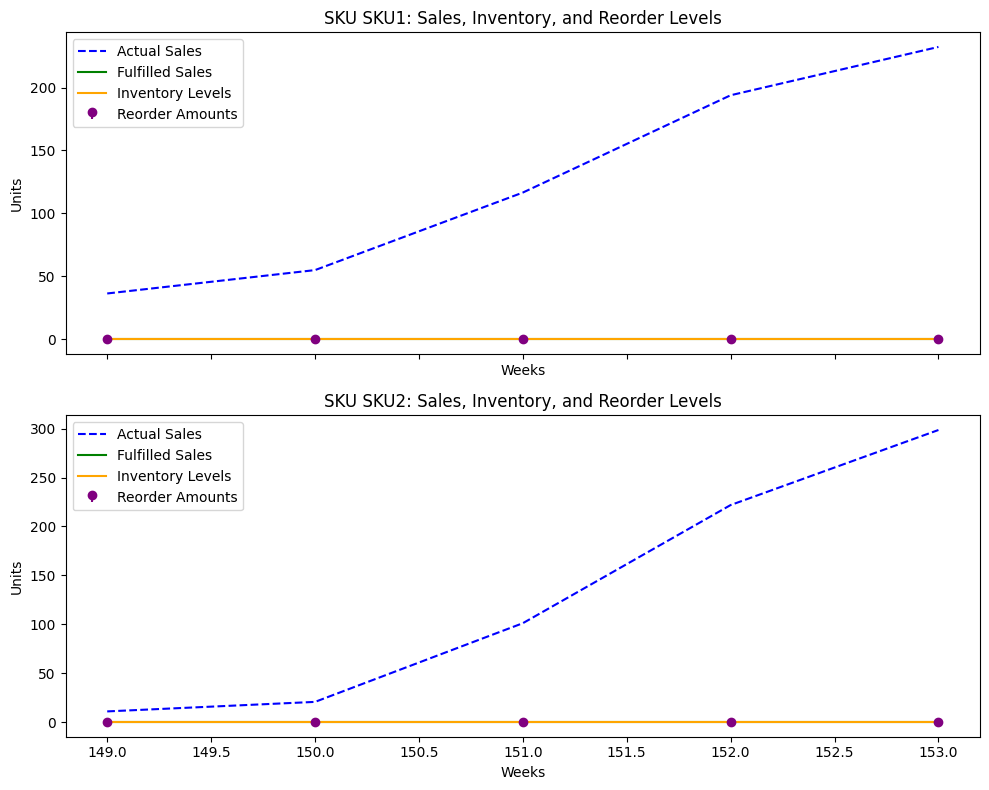

/Users/elizaknapp/Desktop/Harvard/am_207/am207/algorithm.py:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.prices = prices.ravel()
[I 2024-12-01 22:28:49,957] A new study created in memory with name: no-name-9940f42c-aeaf-4294-8a5b-96b2d798d3ad
[I 2024-12-01 22:28:51,074] Trial 0 finished with value: 687.0 and parameters: {'population_size': 48, 'mutation_factor': 0.3605038578281266, 'p_crossover': 0.686769912620355}. Best is trial 0 with value: 687.0.
[I 2024-12-01 22:28:51,411] Trial 1 finished with value: 265.0 and parameters: {'population_size': 16, 'mutation_factor': 1.1939655426751206, 'p_crossover': 0.2853665585731943}. Best is trial 1 with value: 265.0.
[I 2024-12-01 22:28:51,932] Trial 2 finished with value: 460.0 and parameters: {'population_size': 23, 'mutation_factor': 1.084365801474778, 'p_crossover': 0.2523282936428117}. Best is trial 1 with val

[0, 0, 1]


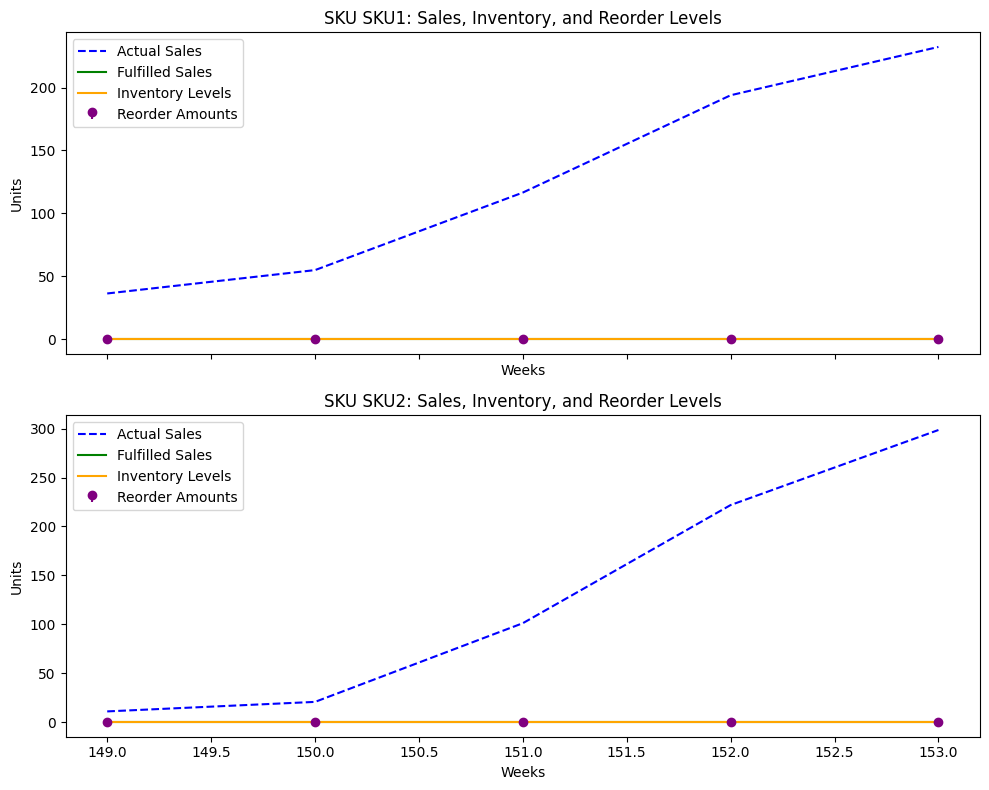

In [9]:
combos = [
  [1, 0, 0],
  [0, 1, 0],
  [0, 0, 1],
]
for combo in combos:
  algo_runner = Algorithm(forecasted_info, policy_optimization_period)
  best_parameters, _, _ = algo_runner.run_algorithm(n_generations, combo[0], combo[1], combo[2])
  showing_skus = 2
  print(combo)
  algo_runner.graph_output(best_parameters, showing_skus)